<a href="https://colab.research.google.com/github/luanakwon/ML_Pytorch_pre2022/blob/main/RNN_PR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attempt of character-wise RNN model - fail

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import string
import random
import matplotlib.pyplot as plt


In [ ]:
#hyperparameters
lr = 0.005
epoch =100

n_hidden = 50
n_embedding = 50
chunk_len = 20
#batch_size = 64


In [ ]:
file_path = 'drive/MyDrive/text_dataset/OldTownRoad.txt'
FILE = str(open(file_path).read())
file_len = len(FILE)
print(FILE[:100])

You know what, I'm done, done, done
Yeah, I'm gonna take my horse
To the old town road
I'm gonna rid


In [ ]:
def random_chunk():
  start_idx = random.randint(0,file_len-chunk_len-1)
  end_idx = start_idx + chunk_len
  return FILE[start_idx:end_idx]
  #return FILE[0:chunk_len]

In [ ]:
chars = string.printable
n_letters = len(chars) + 2

def Encoder(string_):
  onehot = np.zeros((len(string_)+2,n_letters))
  onehot[0][-2] = 1
  onehot[-1][-1] = 1

  for i, s in enumerate(string_):
    try:
      onehot[i+1][chars.index(s)] = 1
    except ValueError:
      onehot[i+1][68] = 1
      print(i, s)
  return onehot

def Decoder(onehot):
  string_ = ''
  onehot = np.argmax(onehot,axis = 1)
  for s in onehot[1:]:
    if s == n_letters-1:
      break
    string_+=chars[s]
  return string_


print(chars[68])
# s = 'ABC'
# o = Encoder(s)
# print(s)
# print(o)
# print(Decoder(o))

'


In [ ]:
class RNN(nn.Module):
  def __init__(self,input_size,num_layers):
    super(RNN,self).__init__()

    self.input_size = input_size
    self.num_layers = num_layers

    self.rnn_layer = nn.GRU(input_size,input_size,num_layers,batch_first=True)

  def forward(self,input_,hidden):
    out, hidden = self.rnn_layer(input_.view(1,1,self.input_size),hidden)
    return out, hidden

  def init_hidden(self):
    return torch.zeros(self.num_layers,1,self.input_size)
    


In [ ]:
loss_func = nn.CrossEntropyLoss()
rnn = RNN(n_letters,3)

optimizer = torch.optim.Adam(rnn.parameters(),lr=lr)

In [ ]:
loss_list = []


for e in range(epoch):
  chunk = Encoder(random_chunk())
  hidden = rnn.init_hidden()

  optimizer.zero_grad()

  total_loss = 0
  for i in range(len(chunk)-1):
    inp = torch.Tensor(chunk[i,:])
    label = torch.LongTensor([np.argmax(chunk[i+1,:])])

    out, hidden = rnn.forward(inp,hidden)
    total_loss += loss_func(out.view(1,-1),label)

  total_loss.backward()
  optimizer.step()

  loss_list.append(total_loss.data)
  if e%10 == 0:
    print('epoch %d, total_loss %f'%(e,total_loss.data))


epoch 0, total_loss 97.291260
epoch 10, total_loss 74.790131
epoch 20, total_loss 74.217659
epoch 30, total_loss 79.565811
epoch 40, total_loss 74.436958
epoch 50, total_loss 77.631973
epoch 60, total_loss 79.589912
epoch 70, total_loss 75.657463
epoch 80, total_loss 75.075996
epoch 90, total_loss 75.807076


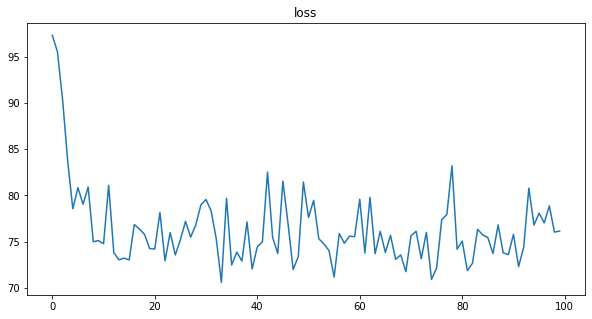

In [ ]:
plt.figure(figsize=(10,5))
plt.title('loss')
plt.plot(loss_list)
plt.show()

In [ ]:
with torch.no_grad():
  start = np.zeros((n_letters))
  start[33] = 1
  o = [start]
  inp = torch.Tensor(start)
  hidden = rnn.init_hidden()


  
  for i in range(chunk_len):
    out, hidden = rnn.forward(inp,hidden)
    out = out.view(-1)
    inp = out

    o.append(out.cpu().numpy())
    
  print(np.argmax(o,axis=1))
  print(Decoder(o))

[33 94 94 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
  eeeeeeeeeeeeeeeeee
